In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
## Do countries with higher smoking rates suffer from more covid-19 deaths?
## Do countries with higher average temperature suffer from more covid-19 cases?

In [3]:
## Reading and cleaning covid data
covid = pd.read_csv('datasets/covid-19.csv')

In [4]:
## Reading and cleaning population size data for each country
population_raw = pd.read_csv('datasets/population.csv')
population = population_raw[['Country', 'Year_2016']]
population = population.rename(columns = {'Year_2016':'PopulationSize'})

In [5]:
## Reading and cleaning smoking data
smoking_raw = pd.read_csv('datasets/smoking.csv')
smoking = smoking_raw[['name', 'totalSmokingRate']].rename(columns = {'name':'Country', 'totalSmokingRate':'SmokingRate'})

In [6]:
## Reading and cleaning temperature data
temperature_raw = pd.read_csv('datasets/temperature.csv')
temperature_raw = temperature_raw.T[[13]].reset_index().rename(columns = {'index':'Country', 13:'Temperature'})
temperature = temperature_raw[temperature_raw.Country != 'year']

In [7]:
## Reading and cleaning testing data 
testing_raw = pd.read_csv('datasets/testing.csv')
testing = testing_raw[['Country or region', 'Tests']]
testing = testing.rename(columns = {'Country or region':'Country'})
testing = testing.loc[~testing['Tests'].isnull()]

In [8]:
## Defining function that eliminates commas from Tests and converts the to float. 
def conversion(test):
    return float(test.replace(',', ''))

In [9]:
## Changing Test type form str to float
testing['Tests'] = testing['Tests'].apply(conversion)

In [10]:
## Merging all the dataframes
deathSmoking = covid.merge(population, how = 'inner', on = 'Country').merge(smoking, how = 'inner', on = 'Country').merge(temperature, how = 'inner', on = 'Country').merge(testing, how = 'inner', on = 'Country')

In [11]:
## Defining fuction that calculates deaths per 100,000 people 
def dthousand(series):
    return (series[4]/series[7])*100000

In [12]:
## Creating new column for deaths per 100,000 people
deathSmoking.loc[(~deathSmoking['PopulationSize'].isnull()), 'DeathsPer100K'] = deathSmoking.loc[~deathSmoking['PopulationSize'].isnull()].apply(dthousand, axis = 1)

Text(0.5, 1.0, 'Relationship Between Population Percentage of Smokers and Covid-19 Caused Deaths')

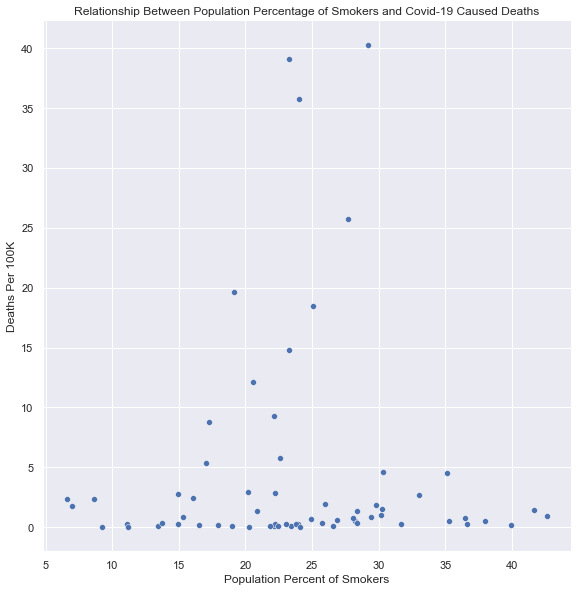

In [13]:
## Creating scatter plot of Relationship between smoking rates and deaths per 100K. 
sns.set()
deathSmokingplot = sns.relplot(x='SmokingRate', y='DeathsPer100K', data=deathSmoking[deathSmoking.Country != 'Andorra'], height=8)
deathSmokingplot.set_axis_labels(x_var="Population Percent of Smokers", y_var="Deaths Per 100K")
plt.title('Relationship Between Population Percentage of Smokers and Covid-19 Caused Deaths')

In [15]:
## Defining function that calculateds confirmed cases for 100k people.
def cthousand(series):
    return (series[2]/series[7])*100000

## Defining function that calcualted tests taken per 100,000 people
def tthousand(series):
    return (series[10]/series[7])*100000

In [16]:
## Creating new column for cases per 100,000 people
deathSmoking.loc[(~deathSmoking['PopulationSize'].isnull()), 'CasesPer100K'] = deathSmoking.loc[~deathSmoking['PopulationSize'].isnull()].apply(cthousand, axis = 1)

In [17]:
## Creating new column for tests taken per 100,000 people
deathSmoking.loc[(~deathSmoking['PopulationSize'].isnull()), 'TestsPer100K'] = deathSmoking.loc[(~deathSmoking['PopulationSize'].isnull())].apply(tthousand, axis = 1)

Text(0.5, 1.0, 'Relationship Between Annual Average Temperature and Covid-19 Cases Per Country')

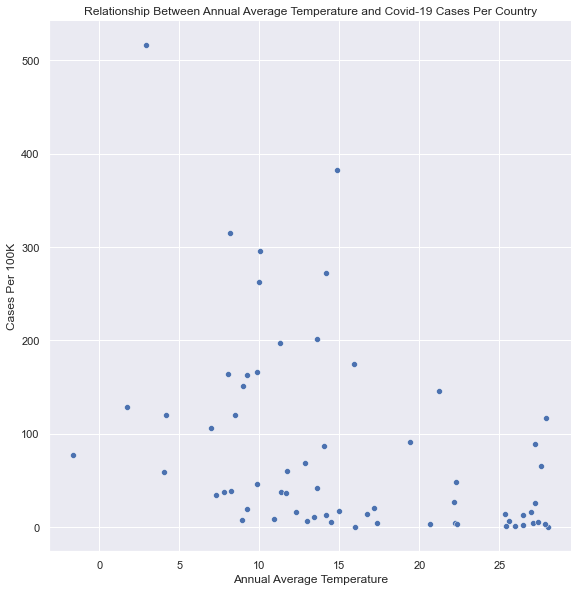

In [18]:
## Creating scatter plot of Relationship between average temeperature and cases per 100K.
sns.set()
deathTemplot = sns.relplot(x='Temperature', y='CasesPer100K', data=deathSmoking[deathSmoking.Country != 'Andorra'], height=8)
deathTemplot.set_axis_labels(x_var="Annual Average Temperature", y_var="Cases Per 100K")
plt.title('Relationship Between Annual Average Temperature and Covid-19 Cases Per Country')

In [19]:
## Checking countries' testing amount and average temperature 
highTemp = deathSmoking[['Country', 'PopulationSize', 'Temperature', 'TestsPer100K']].loc[deathSmoking['Temperature'] >= 15.0].sort_values(by = 'TestsPer100K', ascending = False).head(20)
highTemp                                                                                                                                                                                                                        

,Country,PopulationSize,Temperature,TestsPer100K
6,Bahrain,1425171.0,27.925375,4047.303797
39,Malta,436947.0,19.437375,3665.433107
31,Israel,8547100.0,21.222375,2260.345614
49,Portugal,10324611.0,15.889250,1584.718301
3,Australia,24127159.0,22.142875,1575.001019
52,Singapore,5607283.0,27.602875,846.862910
46,Panama,4034119.0,27.217500,375.472315
38,Malaysia,31187265.0,26.973500,279.546796
25,Greece,10746740.0,17.153500,265.978334
20,Ecuador,16385068.0,22.264125,154.695727


Text(0.5, 1.0, 'Relationship Between Annual Average Temperature and Tests Taken Per 100K ')

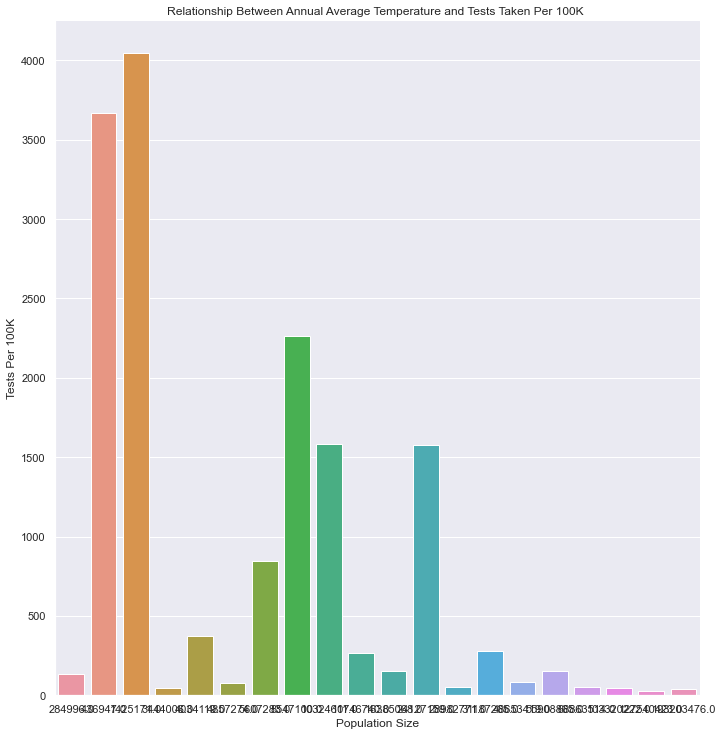

In [20]:
## Creating histogram of population sizes and tests taken among countires with high average annual temperature.
poptemp = sns.catplot(x = 'PopulationSize', y = 'TestsPer100K', kind = 'bar', data = highTemp, height=10)
poptemp.set_axis_labels(x_var="Population Size", y_var="Tests Per 100K")
plt.title('Relationship Between Annual Average Temperature and Tests Taken Per 100K ')

In [22]:
## Do countries with higher obesity rates suffer from more covid-19 deaths?

In [23]:
deathObesity = deathSmoking.copy()

In [24]:
## Reading and cleaning obesty data
obesity_raw = pd.read_csv('datasets/obesity.csv')
obesity = obesity_raw.loc[obesity_raw['Year'] == 2016].drop(columns = ['Code', 'Year']).rename(columns = {'Entity':'Country', 'Share of adults who are obese (%)':'ObesityRate'})

In [25]:
## Merging obesty df to the complete df.
deathObesity = deathObesity.merge(obesity, how = 'inner', on = 'Country').drop(columns = ['SmokingRate', 'Temperature'])

Text(0.5, 1.0, 'Relationship Between Obesity Rate and Covid-19 Deaths')

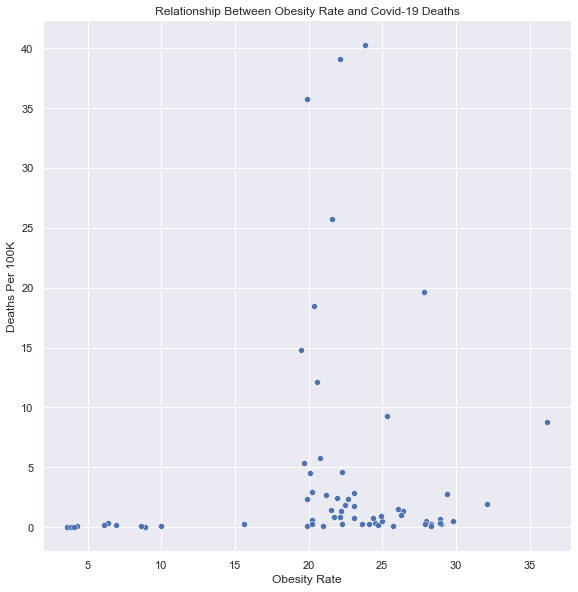

In [26]:
## Creating a scatterplot of ObestyRate and DeathsPer100K.
obesityDeathplot = sns.relplot(x='ObesityRate', y='DeathsPer100K', data=deathObesity[deathObesity.Country != 'Andorra'], height=8)
obesityDeathplot.set_axis_labels(x_var="Obesity Rate", y_var="Deaths Per 100K")
plt.title('Relationship Between Obesity Rate and Covid-19 Deaths')

In [27]:
deathObesity.sort_values(by = 'ObesityRate', ascending=False)[['Country', 'PopulationSize', 'DeathsPer100K', 'TestsPer100K', 'ObesityRate']].head(10)

,Country,PopulationSize,DeathsPer100K,TestsPer100K,ObesityRate
62,United States,323127513.0,8.762485,1014.611219,36.2
59,Turkey,79512426.0,1.909136,651.650347,32.1
6,Bahrain,1425171.0,0.491169,4047.303797,29.8
14,Canada,36286425.0,2.775142,1342.265048,29.4
3,Australia,24127159.0,0.261117,1575.001019,29.0
39,Malta,436947.0,0.686582,3665.433107,28.9
40,Mexico,127540423.0,0.318330,28.692080,28.9
1,Argentina,43847430.0,0.253151,41.113014,28.3
54,South Africa,55908865.0,0.060813,149.641743,28.3
15,Chile,17909754.0,0.524854,490.202155,28.0
